In [8]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.coordinates.transformations
from sunpy.coordinates import frames
import astropy.units as u
import os
import glob
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AffinityPropagation
import matplotlib
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

data_dir = os.path.abspath("/home/lazar/Fak(s)/AF/prakse/SDSA/data")

bitmaps = sorted(glob.glob(os.path.join(data_dir, "3481_11923_SHARP_CEA_bitmaps/*bitmap*")))
cont = sorted(glob.glob(os.path.join(data_dir, "3481_11923_SHARP_CEA_enhanced_norm/*enhanced_normalized*")))

In [4]:
print(bitmaps[600])
print(cont[600])
x = sunpy.map.Map(bitmaps[600])
y = sunpy.map.Map(cont[600])

/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_bitmaps/hmi.sharp_cea_720s.3481.20131213_111200_TAI.bitmap.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


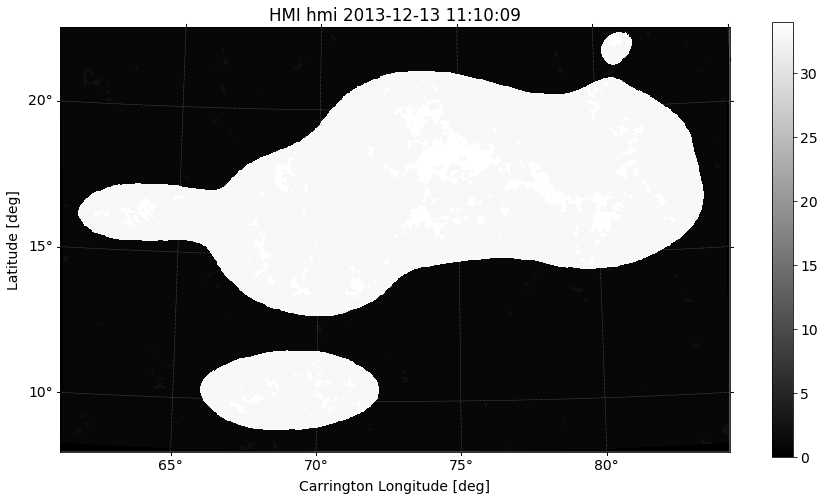

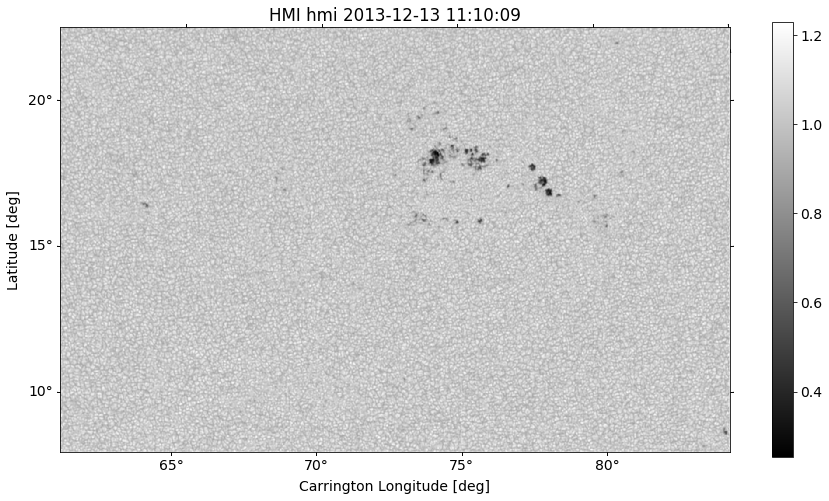

In [5]:
#new_dimension = u.Quantity([x.meta["naxis1"]*2, x.meta["naxis2"]*2], u.pixel)
#x.resample(new_dimension,method='neighbor').peek()
#y.peek()


6
7
7
7
8
7
6
7
6
6
6
7
7
8
8
8
6
7
8
7
5
6
6
6
6
6
5
5
5
5
5
4
5
5
5
5
6
4
3
4
5
3
4
4
4
5
4
3
4
4


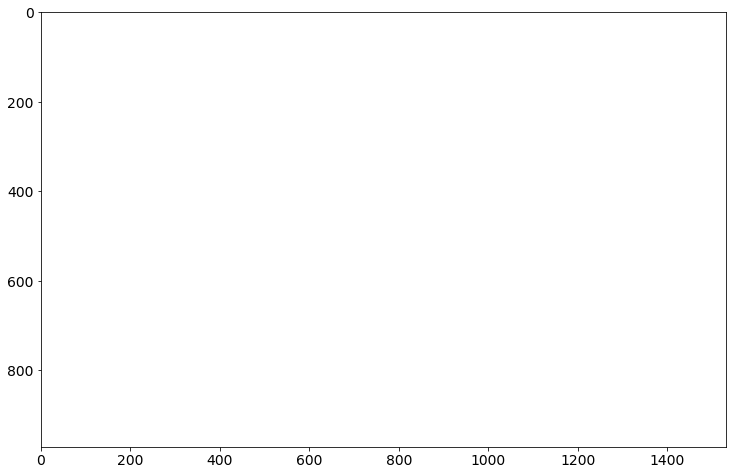

In [146]:
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from celluloid import Camera

#Uncomment this if you want to save .mp4 file
#animation = camera.animate(interval=30)
#animation.save('4381_raw.mp4')


#uncomment this for live preview in jupyter notebook
from IPython.display import HTML
#HTML(animation.to_html5_video())

#model = AgglomerativeClustering(n_clusters=None, distance_threshold=200.).fit(X)

fig = plt.figure()
camera = Camera(fig)

for data in cont[600:700:2]:
    #print(data)
    mapa = sunpy.map.Map(data)
    X = np.argwhere((mapa.data <= 0.5) & (mapa.data > 0))
    #print(len(X))
    if len(X) < 5:
        continue
    #model = MeanShift(bandwidth=18.0).fit(X)    
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=200.).fit(X)
    #model = AgglomerativeClustering(n_clusters=None, distance_threshold=11.5, linkage='single').fit(X)
    mask = X * u.pixel
    pixel_wrld = y.pixel_to_world(mask[:, 1], mask[:, 0])
    #ax = plt.subplot(projection=mapa)
    #mapa.plot()
    plt.imshow(mapa.data, cmap='gray')
    plt.scatter(X[:,1],X[:,0], c=[matplotlib.cm.Spectral(i/np.max(model.labels_)) for i in model.labels_], s=5)
    #plt.colorbar()
    plt.legend([f'Number of clusters {model.n_clusters_}'])
    print(model.n_clusters_)
    #print(model.cluster_centers_.shape[0])
    #plt.legend([f'Number of clusters {model.cluster_centers_.shape[0]}']) #use this for shift
    camera.snap()
    
    #plt.cla()

animation = camera.animate(interval=500) #interval is in ms between frames, 100ms = 10fps
animation.save('agl_500ms.mp4')
HTML(animation.to_html5_video())

6
7


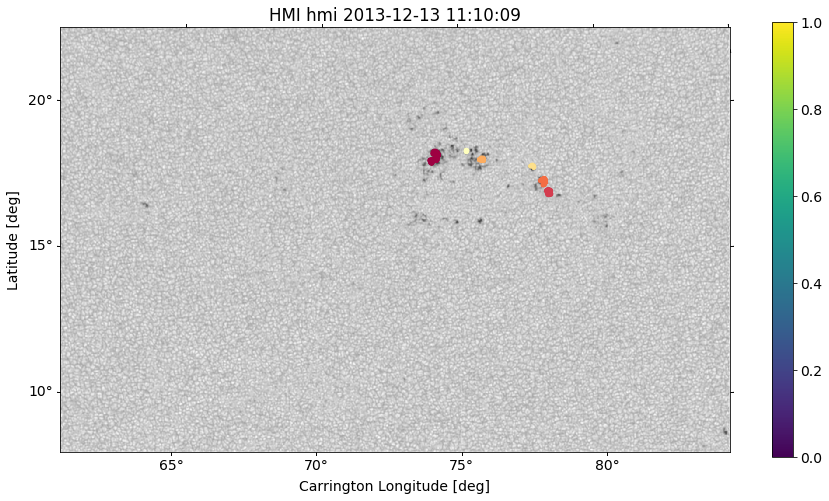

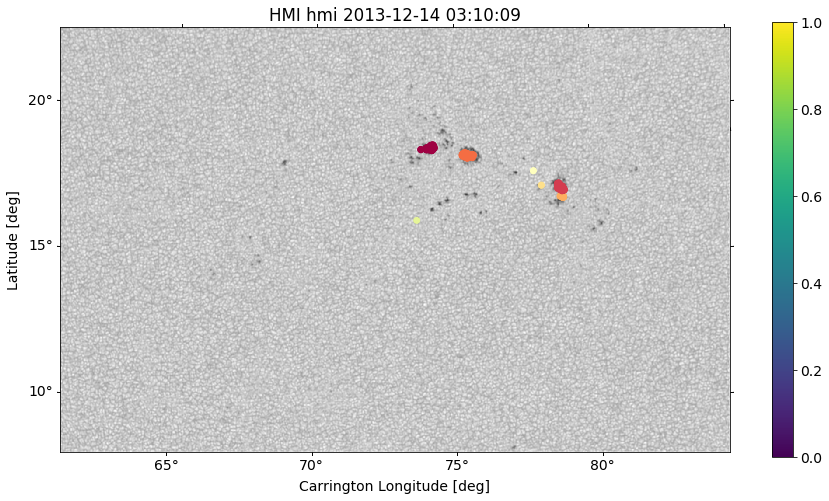

In [148]:
z = mapa = sunpy.map.Map(cont[680])
X = np.argwhere((y.data <= 0.5) & (y.data > 0))
Z = np.argwhere((z.data <= 0.5) & (z.data > 0))
# print(X)

#model = AgglomerativeClustering(n_clusters=None, distance_threshold=11.5, linkage='single').fit(X) #i think this is acceptable
#model2 = AgglomerativeClustering(n_clusters=None, distance_threshold=11.5, linkage='single').fit(Z)

model = MeanShift(bandwidth=12.0).fit(X)
model2= MeanShift(bandwidth=12.0).fit(Z) #po 6,7 na svakoj slici
#model = AffinityPropagation(damping=0.95).fit(X)
#model2 = AffinityPropagation(damping=0.935).fit(Z)


mask = X * u.pixel
mask2 = Z * u.pixel
pixel_wrld = y.pixel_to_world(mask[:, 1], mask[:, 0])
pixel_wrld2 = z.pixel_to_world(mask2[:, 1], mask2[:, 0])
# print(model.cluster_centers_)
# print(model.labels_)
fig = plt.figure(1)
ax = plt.subplot(projection=y)
y.plot()
#ax.plot_coord(pixel_wrld, c=[matplotlib.cm.Spectral(float(i) /10) for i in model.labels_])
plt.scatter(X[:, 1], X[:, 0], c=[matplotlib.cm.Spectral(i/10.)
                                 for i in model.labels_], s=10)
plt.colorbar()
#################
fig = plt.figure(2)
# ax =
plt.clf()
ax = plt.subplot(projection=z)
z.plot()
#ax.plot_coord(pixel_wrld, c=[matplotlib.cm.Spectral(float(i) /10) for i in model.labels_])
plt.scatter(Z[:, 1], Z[:, 0], c=[matplotlib.cm.Spectral(i/10.)
                                 for i in model2.labels_], s=30)
plt.colorbar()

#print(model.n_clusters_)
#print(model2.n_clusters_)
print(model.cluster_centers_.shape[0])
print(model2.cluster_centers_.shape[0])


plt.show()

(612, 2)


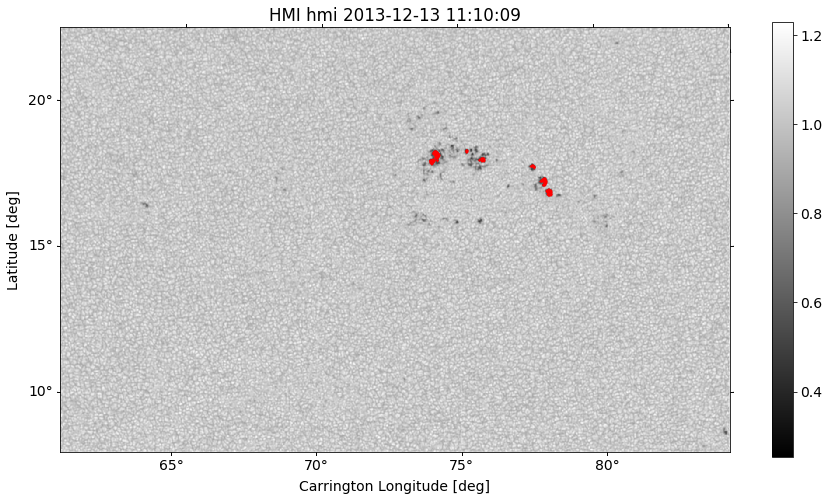

In [28]:
mask = np.argwhere((y.data <= 0.5) & (y.data > 0)) * u.pixel
print(mask.shape)
pixel_wrld = y.pixel_to_world(mask[:, 1], mask[:, 0])

fig = plt.figure()
ax = plt.subplot(projection=y)
y.plot()
ax.plot_coord(pixel_wrld, 'bx', c='red', marker='x', markersize=1)

plt.colorbar()
plt.show()


In [ ]:
print(bitmaps[600])
print(cont[600])
x1 = sunpy.map.Map(bitmaps[0])
y1 = sunpy.map.Map(cont[0])

new_dimension1 = u.Quantity([x1.meta["naxis1"]*2, x1.meta["naxis2"]*2], u.pixel)
x1.resample(new_dimension1,method='spline').peek()
y1.peek()


In [ ]:
mask1 = np.argwhere((y1.data <= 0.5) & (y1.data > 0)) * u.pixel
mask1.shape
pixel_wrld1 = y.pixel_to_world(mask1[:, 1], mask1[:, 0])
print(pixel_wrld1)
fig = plt.figure()
ax = plt.subplot(projection=y1)
y1.plot()
ax.plot_coord(pixel_wrld1, 'bx', color='red', marker='x', markersize=1)
plt.show()